# Chapter 3 - Deep Dive into MDPs

# Finite Markov Decision Processes (Finite MDPs)

These are the problems that the book is aiming to solve. These problems include evaluative feedback, as well as an associative aspects, which is essentially taking different actions depending on the situation (state).

## Agent-Environment Interface

MDPs aim to be a straightforward framing of the problem of learning from interaction to achieve a goal. The learner & decision maker is known as the *agent*. The thing the agent interact with, which includes everything outside the agent, is the *environment*. These two, the *environment* and *agent* interact continually. The agent selects an action, an in return, the agent responds with a new "situation" (state) and a reward. The reward is a numerical value that the agent seeks to maximise over time through its actions. 

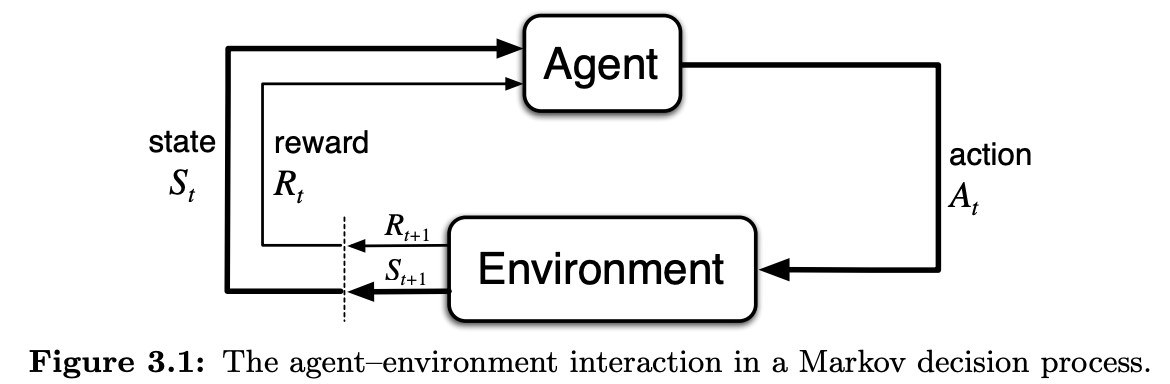


The agent and environment interact through a series of discrete time steps, t=0,1,2,... At least this is our focus now, there are methods to deal with continous scenariois. At each time step t, the agent receives some representation of the environment state, where $S_t\in\mathcal{S}$ and with the state in mind, the agent will make an action, $A_t\in\mathcal{A}(s)$. Then, one timestep later, the agent will receive the numerical reward $R_{t+1}\in\mathcal{R}\subset\mathbb{R}$, this will also lead the agent to a new state, $S_{t+1}$. 

The MDP and agent together therefore give us a sequence (or *trajectory*) that begins like so:

$S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, S_3, A_3, ...$

In *finite* MDPs, the sets of the states, actions and rewards all have finite numbers of elements. Also, the random variables $R_t$ and $S_t$ have well defined discrete probability distributions dependent only on the preceeding state and action. We can put this more concretely in the following formula, p, that describes the dynamics of the MDP:

$p(s',r|s,a) \ \doteq \ \Pr{\{S_t=s',R_t=r|S_{t-1}=s,A_{t-1}=a\}}$

Translated to english - The probability of the next state and reward given the current state and action. 


We can take advantage of this equation to give us other probabilties, such as the state-transition probabilities:

$p(s'|s,a) \ \doteq \ \Pr{\{S_t=s'|S_{t-1}=s,A_{t-1}=a\}=\sum_{r\in\mathcal{R}}p(s',r|s,a)}$

This essentially means that the probability of entering state $s'$ can be found by summing all the probabilities of getting each reward associated with state $s'$.

We can also get the expected rewrads for state-action pairs as a two-argument function:

$r(s,a) \ \doteq \ \mathbb{E}[R_t|S_{t-1}=s,A_{t-1}=a]=\sum_{r\in\mathcal{R}}r\sum_{s'\in\mathcal{S}}p(s',r|s,a)$

This might be a little confusing at first. But essentially the outer summation is adding up the reward weighted by the probability of receiving them. Since this is a finite MDP, the set of rewards is finite. 

A thing I was confused about here is that for a given state, it might not be possible to get every reward, but the probability of getting the reward would just be 0. This is a fairly simple equation.

We can also derive the equation to get the expected rewards for a state-action-next-state as a three argument function:

$r(s,a,s') = \mathbb{E}[R_t|S_{t-1}=s,A_{t-1}=a,S_t=s']=\sum_{r\in\mathcal{R}}r\frac{p(s',r|s,a)}{p(s'|s,a)}$

This is similar to the previous equation. It sums over all rewards, gets the probability of getting that reward, then divides by the probability of getting into the state s', normalising the result such that it's purely about the reward in state s', rather than the total reward.



Exercise 3.1

A simple MDP would be the cart pole. This involves a cart that moves either left, right or doesn't move, and aims to keep a pole on it upright by balancing it. The state would the be angle and angular momentum of the pole as well as the position of the cart. The actions would be left, right or none. The reward would be +1 every second, and a negative reward for letting the pole fall.

Another could be cleaning a window. For this example, let's say we have a robot arm that tries to wipe a window using a window wiper. The actions would be the voltages applied to each part of the arm. The state would be the location, momentum, etc of the arm as well as the current water on the window. The agent would be rewarded by how clean the window is once they're done. 

Traffic lights could also be an example. The actions would be setting the lights to green or red. The rewrd would be related to how many cars pass through the intersection, although it may need to be weighted depending on lanes and the overall context. The stte would be the number of cars coming each way.


Exercise 3.2

MDPs rely on the Markov Property, so the current state contain all the necessary information to make decisions, independant of past moves. 

MDPs perform poorly on spare rewards or delayed rewards, making some MDPs very inefficient.

MDPs also don't perform well on hierarchical goals and changing/evolving goals. For example a group of people could be working on a project, only for them to realise their goal was incorrect half way through.

Exercise 3.4 

| s | a | s' | r | p(s', r \| s, a) |
| - | - | -- | - | --------------- |
| high | search | high | $r_{search}$ | $\alpha$ |
| high | search | low | $r_{search}$ | 1 - $\alpha$ | 

# Returns and Episodes

So far we've only used rewards, which is an immediate acknowledgement of behaviour of the agent. But in many cases, we may not know, or even want, to give the agent a reward until our goal is achieved. For example chess, many moves in chess give a non-terminal state, so we haven't achieved our goal. So we need a way of delaying the reward. We can do this through the concept of a Return.

The return, or expected return, is the sum of the rewards from timestep t to timestep T(the final timestep of the episode):

$G_t = R_{t+1} + R_{t+2} + ... + R_T,$

The timestep T is only really applicable when it makes sense for there to be a final timestep. Like in chess, timestep T would be the move that makes checkmate. These instances of time t to T are known as episodes, and they end in a "terminal" state. After this, the environment is reset to a standard starting state or from a standard distribution of starting states.

Tasks with episodes like this are known as *episodic tasks*. In these types of tasks, we may want to denote the set of terminal states to be separate from the regular state set $\mathcal{S}$, we call the set of states plus terminal states $\mathcal{S}^+$



In continous tasks, where T = $\infty$, we need to slightly alter the return as $G_t$ would easily be infinity also. So we introduce the concept of *discounting*.  In this case, the agent tries to make the decisions that best maximise the future discounted return:

$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+2} + ... = \sum^\infty_{k=0}\gamma^kR_{t+k+1}$

Where $\gamma$ is a paramter that's between 0 and 1 (inclusive), known as the discount rate. The discount rate determines how much we value future rewards. A reward received k time steps in the future is only worth $\gamma^{k-1}$, for example if our $\gamma = 0.1$ and we were 5 timesteps in the future, a reward of 100 would only be worth $100\cdot0.1^4$ or 0.01. 

If gamma is 1, then we value all future rewards equally, but also means we can't deal with continous tasks due to the return being infinte. If the gamma is 0, then the agent is myopic, and only cares about the next reward.


### Recursive nature of returns

Returns have a recursive relationship with itself, which becomes important for the theory and algorithms of reinforcement learning:

$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2R_{t+3}+\gamma^3R_{t+4}+...$

$= R_{t+1} + \gamma(R_{t+2} + \gamma R_{t+3} + \gamma^2 R_{t+4} + ... )$

$= R_{t+1} + \gamma G_{t+1}$

Exercise 3.6

The return could be zero here if the pole never falls. This is because we could reach time T before the pole falls, and so the expected return would be 0 the entire time, unless it falls. This differs from the continous version where it would always be atleast slightly negative and would become more and more negative as it approaches falling over.

In this case we wouldn't use zero for everything except falling in the episodic case as the reward signal would be quite poor of the pole is balancing well. 

Exercise 3.7

If we're using the undiscounted return and an episodic design, then having only +1 for finishing would end up having the agent value all possible states as +1. This is because no matter how long it takes, it will always end up looking something like: 

$G_t = 0 + 0 + ... + 0 + 1 = 1$

So the agent will never learn as it will just go to every state until it gets to the end, without learning anything. We can fix this be adding -1 to every timestep that isn't the terminal state.

Exercise 3.8

$G_5 = 0$ # As defined previously, $G_T$ is typically 0

$G_4 = 2 + 0.5 * 0 = 2$

$G_3 = 3 + 0.5 * 2 = 4$

$G_2 = 6 + 0.5 * 4 = 8$

$G_1 = 2 + 0.5 * 8 = 6$

$G_0 = -1 + 0.5 * 6 = 2$

Exercise 3.9

$ G_1 = \frac{7}{1-0.9} = 70$

$ G_0 = 2 + 0.9 * 70 = 65$



## Policies and Value Functions

A *policy* is a mapping from states to probabilities of selecting each possible action. For example is the agent is following the policy $\pi$ at timestep t, then $\pi(a|s)$ is the probability of selecting $A_t=a$ if $S_t=s$ 

Exercise 3.11

$\mathbb{E}[R_{t+1} \ | \ S_t = s] = \sum_a\pi(a|s) \sum_{s',r}r \ p(s',r|s,a) $

Essnetially stating, sum the probability of each action multiplied the expected reward of that action. 


### Value function

The *value function* of a state s under policy $\pi$, denoted $v_{\pi}(s)$, is the expected return starting in s and following $\pi$ thereafter. They can be defined formally:

$v_{\pi}(s) \doteq \mathbb{E}_{\pi}[G_t|S_t=s]=\mathbb{E}_{\pi}[\sum^{\infty}_{k=0}\gamma^kR_{t+k+1}|S_t=s], \text{for all s} \in \mathcal{S}$

Exercise 3.12

$ v_{\pi}(s) = \sum_a \pi(a|s) q_{\pi}(s,a)$ 

Exercise 3.13

$ q_{\pi}(s, a) = \frac{v_{\pi}(s)}{p(s',r|s,a)}$ 
This is wrong


$ q_{\pi}(s, a) = \sum_{s',a} p(s',r|s,a)[r+\gamma v_{\pi}(s')]$

This basically means that multiply the probability of transitions to s' and getting r by the discounted expected return of v' plus the reward r from the transition probability. 


Exercise 3.14

(0.25 * 0.9 * 2.3) + (0.25 * 0.9 * 0.4) + (0.25 * 0.9 * -0.4) + (0.25 * 0.9 * 0.7) = 0.675 = 0.7 (1 d.p.)

Exercise 3.15

The signs would be important because in reinforcement learning, we're trying to maximise the reward signal. So if we were to change the signs, we'd want to minimise the signal to get our optimal behaviour, which goes against what we try to achieve in RL.


$ G_{t} = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + ... = \sum^{\infty}_{k=0}\gamma^{k}R_{t+k+1}$ (3.8)

$ G_{t} = (R_{t+1} + c) + \gamma (R_{t+2} + c) + \gamma^2 (R_{t+3} + c) + ... = \sum^{\infty}_{k=0}\gamma^{k}(R_{t+k+1}+c)$ 

$ G_{t} = (R_{t+1} + c) + \gamma(G_{t-1} + c)$


$v_c = \frac{c}{1-\gamma}$ By (3.10) 

Correct Answer:

We insert 3.8 into 3.12 like so:

$v_{pi}(s) = \mathbb{E}[\sum^{\infty}_{k=0}\gamma^k R_{t+k+1}]$

$= \mathbb{E}[\sum^{\infty}_{k=0}\gamma^k (R_{t+k+1}+c)]$ Add c

$= \mathbb{E}[\sum^{\infty}_{k=0}\gamma^k (R_{t+k+1})] + \sum^{\infty}_k\gamma^kc$ Seperate c from expectation

$= v_{\pi}(s) + \sum^{\infty}_k\gamma^kc$ By definition of $v_{pi}(s)$

$= v_{\pi}(s) + \frac{c}{1-\gamma}$ By 3.10

So $v_c = \frac{c}{1-\gamma}$

Exercise 3.16

Yes it would have an effect. If in the episodic case the reward is 0 until we reach the end, then adding a constant will likely cause the agent to just go back and forth between two states, maximising their reward to infinity. If it were a negative constant however it would help the agent learn to complete the maze in as few transitions as possible, to maximise the reward. - Semi Right

In episodic tasks, the agent always finishes, regardless of whether it's reached the terminating state. So adding c would just cause the agent to find longer paths that maxmimise the rewards gained from c. If it's negative, the same thing happens as before, it will try to find the quickest path to avoid the rewards from c.

Exercise 3.12 # Repeating for clarity

$ v_{\pi}(s) = \sum_a \pi(a | s) q_{\pi}(s,a)$

So the value function (in terms of $\pi$ and q) is just the weighted sum of the action values, weighted by how likely that action is to be taken given the policy

Exercise 3.13 # Also repeating

$ q_{\pi}(s, a) = \sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]$

Here, the action value (in terms of v and the four argument p - function transition probability) is the double sum over all subsequent states and reward, where we get the expected return of the state transition (r+v_{pi}(s')) weighted by the probability of transitioning to that state and getting a corresponding reward (transition probaility).

Exercise 3.17

1. $q_{\pi}(s, a) = \mathbb{E}_{\pi}[G_t | S_t=s, A_t=a] = \mathbb{E}_{\pi}[\sum^{\infty}_{k=0}\gamma^k R_{t+k+1} | S_t=s, A_t=a] $ # Definition of q


2. $q_{\pi}(s, a) = R_{t+1} + \gamma G_{t+1}$ # Decompensation of $G_t$


3. $q_{\pi}(s, a) = \sum_{s', r} p(s',r|s,a) \mathbb{E}_{\pi}[r+G_{t+1} | S=s, A=a, S'=s', R_{t+1}=r]$ # Applying the law of total probability

In this step we're essentially saying the expected value of the action (q) is the double sum of all possible subsequent rewards and returns, weighted by the probaility of them occuring And the returns are dependant on the subsequent states.


4. $q_{\pi}(s, a) = \sum_{s', r} p(s',r|s,a)[r + \gamma \mathbb{E}_{\pi}[G_{t+1}| S'=s']]$ # We can take the reward r out of the expectation because it's fixed by the transition probability. So we're only left with the expectation of the subsequent return ($G_{t+1}$), and this is only dependant on s'. This is the definition of the value function.


5. $q_{\pi}(s, a) = \sum_{s', r} p(s',r|s,a)[r+ \gamma v(s')]$ # Substitue expectation for subsequent value function


6. $v_{\pi}(s)=\sum_a \pi(a|s)q_{\pi}(s,a)$ # The definition of the value function in terms of q


7. $q_{\pi}(s, a) = \sum_{s', r} p(s',r|s,a)[r+\gamma \sum_{a'}\pi(a'|s')q_{\pi}(s',a')]$ # Substitute in the definition of the value function in terms of q, thus giving the bellman equation for the action-value q



Exercise 3.18

1. $v_{\pi}(s)=\mathbb{E}_{\pi}[A_t = a | S_t = s]q_{\pi}(s,a)$ # Wrong

1. $v_{\pi}(s)=\sum_{a}\mathbb{E}_{\pi}[1\{A_t=a\}|S_t=s]q_{\pi}(s,a)$ # Correct but messy, uses an indicator random variable, this does show us more explicitly where $\pi$ comes into it, which is helpful.

1. $v_{\pi}(s)=\mathbb{E}_{\pi}[q_{\pi}(s,A_t)|S_t=s]$

2. $v_{\pi}(s)=\sum_a\pi(a|s)q_{\pi}(s,a)$

Exercise 3.19

1. $q_{\pi}(s, a)= \mathbb{E}[R_{t+1} + \gamma v_{\pi}(S_t+1) | S_t=s, A_t=a]$

2. $q_{\pi}(s,a)=\sum_{s', r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]$

## 3.6 Optimal policies and value functions

Solving reinforcement learning problems means that we're essentially trying to find a policy that achieves a reward over the long run. To do this, we need to find a good policy, and for finite MDPs, we can define an optimal policy the following way. Our value functions define how we do the partial ordering for different policy. A policy $\pi$ is defined to be better than or equal to another policy $\pi'$ if its expected return is greater than equal to that of $\pi'$ for all states. 

So $\pi\geq\pi'$ if and only if $v_{\pi}(s)\geq v_{\pi'}(s)$ for all $s\in\mathcal{S}$.
For all problems, there is a policy that is better or equal to all other policies, this is known as the *optimal policy*. There may be more than one, and we denote them as $\pi_*$. They share the same state-value function, known as the *optimal state-value function* and denoted as $v_*$ and defined as:

$v_*(s)=max_{\pi}v_{\pi}(s) \ \text{for all s} \in\mathcal{S}$

Optimal policies share the same *optimal action-value function*, denoted $q_*$, defined as:

$q_*(s,a)=max_{\pi}q_{\pi}(s,a)$

For all $s\in\mathcal{S} \ and \ a \in\mathcal{A}(s)$ 

We can also denote it in the expected return form for taking action a in state s and thereafter.

$q_*(s,a)=\mathbb{E}[R_{t+1}+\gamma v_*(S_{t+1}|S_t=s,A_t=a)]$


An interesting consequence of optimal policies and value functions is that the value function for each state will be equal to the best possible action in that state, because there are no other better actions, so we don't need to consider them.

This allows us to write $v_*$ in a special form, known as the Bellman optimality equation:

$v_*(s)=\max_{a\in\mathcal{A}(s)}q_{\pi_*}(s,a)$

$=\max_{a}\mathbb{E}_{\pi_*}[G_t|S_t=s,A_t=a]$

$=\max_{a}\mathbb{E}_{\pi_*}[R_{t+1} + \gamma G_{t+1} | S_t=s, A_t=a]$

$=\max_{a}\mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1})|S_t=s, A_t=a]$

$=\max_a\sum_{s',r}p(s',r|s,a)[r+\gamma v_*(s')]$

These last two equations are two forms of the bellman optimality equation for $v_*$

We also have bellman optimality equations for $q_*(s,a)$

$q_*(s,a)=\mathbb{E}[R_{t+1}+\gamma \max_{a'}q_*(S_{t+1},a')|S_t,A_t=a]$

$=\sum_{s',r}p(s',r|s,a)[r+\gamma \max_{a'}q_*(s',a')]$


Exercise 3.20

We know from the definition of the optimal value-function that it's equivalent to it's corresponding max action-value-function. We know from 3.7 that the optimal policy is to use the driver twice, so the $v_*$ for the first two states would be $q_*(s,driver)$ from figure 3.3. After that it would likely look similiar to $v_putt$, as that putt is optimal after this. 

Exercise 3.21

It would be the same as $v_{putt}$, assuming that $v_{putt}$ gives the optimal value-states for only using the putter.

Exercise 3.22

For $\gamma=0$, $\pi_{left}$ would be optimal as we only care about the reward from the next move. If $\gamma=0.5$, then both policies would be the optimal policy as for left, the expected return would be 1 and the expected return for right would be $0+0.5*2=1$, so both are optimal. For $\gamma=0.9$, right would be optimal as $0+0.9*2=1.8$ and left would only be 1.

Exercise 3.25

$$
v_*(s)=\max_{a\in\mathcal{A(s)}}q_*(s,a)
$$

Exercise 3.26

$$
q_*(s,a)=\sum_{s',r}p(s',r|s,a)[r+\gamma v_*(s')]
$$

Exercise 3.27

$$
\pi_*=\argmax_{a\in\mathcal{A}(s)}q_*(s,a)
$$
For discrete actions

Exercise 3.28

$$
\pi_*=\argmax_{a\in\mathcal{A}(s)}\sum_{s',r}p(s',r|s,a)[r+\gamma v_*(s')]
$$
For discrete actions

Exercise 3.29

3.4
$$
p(s'|s,a)=\Pr\{S_t=s'|S_{t-1}=s,A_{t-1}=a\}=\sum_{r\in\mathcal{R}}p(s',r|s,a)
$$

3.5
$$
r(s,a)=\mathbb{E}[R_t|S_{t-1=s,A_{t-1}=a}]=\sum_{r\in\mathcal{R}}r\sum_{s'\in\mathcal{S}}p(s',r|s,a)
$$

Exercise 3.29 Continued ($v_{\pi}(s)$)

$$
v_{\pi}(s)=\sum_{a}\pi(a|s)\sum_{s',a'}p(s'|s,a)r(s',a') \text{\ Incorrect}
$$


$$
v_{\pi}(s)=\sum_{a}\pi(a|s)[r(s,a)+ \gamma \sum_{s'}p(s'|s,a) v_{\pi}(s')]
$$

Exercise 3.29 ($q_{\pi}(s)$)

$$
q_{\pi}(s, a) = r(s,a)+\gamma \sum_{s'} p(s'|s,a)v_{\pi}(s')
$$
I was mostly there, I was most importantly wrong in placing the expected reward function, there should only be one

Exercise 3.29 ($v_*(s)$)

$$
v_*(s)=\max_a[r(s,a)+\gamma \sum_{s'}p(s'|s,a)v_*(s')]
$$

Exercise 3.29  $\ q_*(s,a)$

$$
q_*(s,a)=r(s,a)+\gamma \sum_{s'}p(s'|s,a)v_*(s')
$$

### Optimality and Approximation

While optimal policies are nice, they rarely actually useful due to the large amounts of computation needed to get them, so the best we can do is approximate.